**Обработка stops_data**


# Просмотр и первичный анализ данных

In [23]:
import pandas as pd

In [24]:
csv_data.head()

,№,Вид транспортного средства,Тип объекта,Наименование остановки,Официальное наименование,Расположение,Маршруты,Координаты
0,1,Автобус,Остановка,10 КМ,10 КМ,Таллинское ш,"145, 145Б, 147, 165, 245, 458, 458Б, 481, 482,...","59.773371824760758,30.1251106"
1,2,Автобус,Остановка,12-13 ЛИНИИ В.О,12-13 ЛИНИИ В.О,"Средний пр., 12-13-я линии","249, 6","59.941120573475885,30.2717571"
2,3,Автобус,Остановка,"БОЛЬШОЙ ПР. В.О., УГОЛ 16-17-Й ЛИНИЙ В.О","БОЛЬШОЙ ПР. В.О., УГОЛ 16-17-Й ЛИНИЙ В.О","Большой пр. В.О., Большой ВО Проспект","1, 128, 151, 262, 42, 7","59.935553859802589,30.2711468"
3,4,Автобус,Остановка,МУЗЕЙ ГОРОДСКОГО НАЗЕМНОГО ТРАНСПОРТА,МУЗЕЙ ГОРОДСКОГО НАЗЕМНОГО ТРАНСПОРТА,"Средний пр., 18-19-я линии","249, 6","59.938797516478004,30.2641411"
4,5,Автобус,Остановка,"1-Я И КАДЕТСКАЯ ЛИНИИ В.О., УГОЛ СРЕДНЕГО ПР. В.О","1-Я И КАДЕТСКАЯ ЛИНИИ В.О., УГОЛ СРЕДНЕГО ПР. В.О","1-я и Кадетская линии, Репина ул","24, 6","59.944538147929435,30.2870083"


Посмотрим на данные только для трамваев

In [53]:
tram_df = csv_data[csv_data['Вид транспортного средства'] == 'Трамвай']
tram_df.head()

,№,Вид транспортного средства,Тип объекта,Наименование остановки,Официальное наименование,Расположение,Маршруты,Координаты
3218,3219,Трамвай,Остановка,"Пр. Солидарности, 19","Пр. Солидарности, 19","проспект Солидарности, улица Лопатина","23, 27, 65, 7, А","59.916037323856045,30.4972858"
3219,3220,Трамвай,Остановка,Ул. Передовиков,Ул. Передовиков,"проспект Косыгина, улица Передовиков","59, 63, 64, 8","59.941753484211333,30.4667587"
3220,3221,Трамвай,Остановка,Ул. Дыбенко,Ул. Дыбенко,"ул. Дыбенко, проспект Солидарности","23, 27, 65, 7, А","59.912161401879899,30.4997177"
3221,3222,Трамвай,Остановка,Индустриальный пр,Индустриальный пр,"проспект Косыгина, Индустриальный проспект","59, 63, 64, 8","59.944469731476048,30.4772091"
3222,3223,Трамвай,Остановка,Ул. Осипенко,Ул. Осипенко,"проспект Косыгина, улица Осипенко","59, 63, 64, 8","59.944863124155063,30.4842777"


Будем работать только с нужными для нас столбцами

In [27]:
filtered_tram_df = tram_df[['№', 'Официальное наименование', 'Координаты', 'Маршруты']]

Проверим данные на наличие дубликатов

In [32]:
import numpy as np

df = filtered_tram_df

print("Общая информация о таблице:")
print(f"Всего строк: {len(df)}")
print(f"Всего столбцов: {len(df.columns)}")
print(f"Столбцы: {list(df.columns)}")
print("-" * 100)

def analyze_column(column_name, series):

    unique_count = series.nunique(dropna=True)

    duplicate_count = len(series) - unique_count
    duplicate_percent = (duplicate_count / len(series)) * 100 if len(series) > 0 else 0

    return {
        'column': column_name,
        'total': len(series),
        'non_null': series.count(),
        'null': series.isna().sum(),
        'unique': unique_count,
        'duplicates': duplicate_count,
        'duplicate_percent': duplicate_percent
    }

results = []
results.append(analyze_column('Официальное наименование', df['Официальное наименование']))

summary_df = pd.DataFrame(results)
print(summary_df.to_string(index=False))




Общая информация о таблице:
Всего строк: 888
Всего столбцов: 4
Столбцы: ['№', 'Официальное наименование', 'Координаты', 'Маршруты']
----------------------------------------------------------------------------------------------------
                  column  total  non_null  null  unique  duplicates  duplicate_percent
Официальное наименование    888       888     0     463         425           47.86036


Удалим повторяющиеся названия

In [33]:
filtered_tram_df = df.drop_duplicates(subset=['Официальное наименование'], keep='first')

print(f"Исходно: {len(df)} строк")
print(f"После удаления дубликатов: {len(filtered_tram_df )} строк")
print(f"Удалено: {len(df) - len(filtered_tram_df )} дубликатов")


Исходно: 888 строк
После удаления дубликатов: 463 строк
Удалено: 425 дубликатов


Определим для каждой остановки ее район

In [ ]:
DISTRICT_BOUNDS = {
    'Красногвардейский': {
        'lat_min': 59.91, 'lat_max': 59.96,
        'lon_min': 30.40, 'lon_max': 30.50,
        'keywords': ['красногвардей', 'большевик', 'новочеркасск', 'заневск']
    },
    'Невский': {
        'lat_min': 59.87, 'lat_max': 59.93,
        'lon_min': 30.35, 'lon_max': 30.50,
        'keywords': ['невск', 'рыбацк', 'обухово', 'славянк']
    },
    'Центральный': {
        'lat_min': 59.91, 'lat_max': 59.95,
        'lon_min': 30.30, 'lon_max': 30.40,
        'keywords': ['центральн', 'лиговск', 'литейн', 'суворовск']
    },
    'Адмиралтейский': {
        'lat_min': 59.91, 'lat_max': 59.93,
        'lon_min': 30.28, 'lon_max': 30.33,
        'keywords': ['адмиралт', 'исаакиевск', 'сенн', 'садова']
    },
    'Василеостровский': {
        'lat_min': 59.93, 'lat_max': 59.95,
        'lon_min': 30.23, 'lon_max': 30.30,
        'keywords': ['василеостров', 'в.о.', 'гаванск', 'наличн']
    },
    'Петроградский': {
        'lat_min': 59.95, 'lat_max': 59.97,
        'lon_min': 30.28, 'lon_max': 30.32,
        'keywords': ['петроград', 'чёрная речка', 'петровск', 'аптекарск']
    },
    'Калининский': {
        'lat_min': 59.95, 'lat_max': 60.05,
        'lon_min': 30.35, 'lon_max': 30.42,
        'keywords': ['калинин', 'политехн', 'академическ', 'мужеств']
    },
    'Выборгский': {
        'lat_min': 60.00, 'lat_max': 60.07,
        'lon_min': 30.30, 'lon_max': 30.40,
        'keywords': ['выборгск', 'озерк', 'удельн', 'парнас']
    },
    'Приморский': {
        'lat_min': 59.97, 'lat_max': 60.05,
        'lon_min': 30.20, 'lon_max': 30.30,
        'keywords': ['приморск', 'чёрная речка', 'старая деревня', 'комендантск']
    },
    'Фрунзенский': {
        'lat_min': 59.85, 'lat_max': 59.90,
        'lon_min': 30.35, 'lon_max': 30.45,
        'keywords': ['фрунзен', 'купчин', 'бухарестск', 'славы']
    },
    'Московский': {
        'lat_min': 59.85, 'lat_max': 59.90,
        'lon_min': 30.30, 'lon_max': 30.35,
        'keywords': ['московск', 'электросил', 'звёздн', 'победы']
    },
    'Кировский': {
        'lat_min': 59.86, 'lat_max': 59.91,
        'lon_min': 30.20, 'lon_max': 30.30,
        'keywords': ['кировск', 'автово', 'нарвск', 'ветеранов']
    },
    'Красносельский': {
        'lat_min': 59.82, 'lat_max': 59.86,
        'lon_min': 30.10, 'lon_max': 30.25,
        'keywords': ['красносельск', 'южно-приморск', 'сосновая поляна', 'горелово']
    }
}

def find_district(lat, lon, name):
    if lat is None or lon is None:
        return 'Ошибка координат'

    name_lower = str(name).lower()

    for district, bounds in DISTRICT_BOUNDS.items():
        if (bounds['lat_min'] <= lat <= bounds['lat_max'] and
            bounds['lon_min'] <= lon <= bounds['lon_max']):
            return district

    for district, bounds in DISTRICT_BOUNDS.items():
        for keyword in bounds['keywords']:
            if keyword in name_lower:
                return district

    return 'Район не определен'

print("Статистика по районам:")
print(filtered_tram_df['Район'].value_counts())
print(f"\nВсего остановок: {len(filtered_tram_df)}")
print(f"Не определено: {len(filtered_tram_df[filtered_tram_df['Район'] == 'Район не определен'])}")

Статистика по районам:
Район
Район не определен    94
Красногвардейский     53
Калининский           53
Невский               48
Красносельский        38
Выборгский            30
Центральный           28
Кировский             26
Приморский            26
Московский            22
Василеостровский      17
Петроградский         12
Фрунзенский           11
Адмиралтейский         5
Name: count, dtype: int64

Всего остановок: 463
Не определено: 94


/tmp/ipython-input-3575294431.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tram_df['X'] = filtered_tram_df['Координаты'].apply(lambda x: parse_coords(x)[0] if pd.notna(x) else None)
/tmp/ipython-input-3575294431.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tram_df['Y'] = filtered_tram_df['Координаты'].apply(lambda x: parse_coords(x)[1] if pd.notna(x) else None)
/tmp/ipython-input-3575294431.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
filtered_tram_df[filtered_tram_df['Район'] == 'Район не определен'].to_csv('not_founded.csv')

In [ ]:

manual_districts = {
    # Калининский район
    3226: 'Калининский',  # Ул. Руставели, 29
    3232: 'Калининский',  # Пр. Науки, 73
    3234: 'Калининский',  # Ул. Карпинского
    3668: 'Калининский',  # Пр. Науки
    3663: 'Калининский',  # Ул. Верности
    3771: 'Калининский',  # Пр. Непокорённых
    3645: 'Калининский',
    6845: 'Калининский',

    # Приморский район
    3240: 'Приморский',  # Конечная станция "Ул. Кораблестроителей"
    3253: 'Приморский',  # Уральская ул
    3278: 'Приморский',  # Конечная станция "Пл. Репина"
    3603: 'Приморский',  # Конечная станция "Посёлок Стрельна"
    3925: 'Приморский',  # Кикенка
    3437: 'Приморский',
    3446: 'Приморский',
    6895: 'Приморский',

    # Красногвардейский район
    3333: 'Красногвардейский',  # Гостиница "Санкт-Петербург"
    3386: 'Красногвардейский',  # Ул. Коммуны
    3397: 'Красногвардейский',  # Ул. Лазо
    3614: 'Красногвардейский',  # Конечная станция "Пр. Мечникова"
    3640: 'Красногвардейский',  # Пр. Мечникова
    7280: 'Красногвардейский',

    # Выборгский район
    3382: 'Выборгский',
    3388: 'Выборгский',  # Ст. метро "Лесная"
    3391: 'Выборгский',  # Ул. Александра Матросова
    3393: 'Выборгский',  # Литовская ул
    3457: 'Выборгский',  # Большой Сампсониевский пр
    3556: 'Выборгский',  # Новосибирская ул
    3662: 'Выборгский',  # Большая Монетная ул
    3713: 'Выборгский',  # Трамвайный парк № 3
    3722: 'Выборгский',  # 1-й Медицинский институт
    3741: 'Выборгский',  # Вяземский пер
    3636: 'Выборгский',  # Ул. Профессора Попова
    4055: 'Выборгский',  # Лесной пр
    4056: 'Выборгский',  # 1-й Муринский пр
    4067: 'Выборгский',  # Большой Сампсониевский пр
    4072: 'Выборгский',  # Наб. Чёрной речки
    4074: 'Выборгский',  # Студенческая ул., ж.-д. станция Ланская
    4078: 'Выборгский',  # Пр. Луначарского (оборотная)

    # Центральный район
    3343: 'Центральный',  # Пл. Военных Медиков
    3375: 'Центральный',  # Ул. Чапаева
    3676: 'Центральный',  # Ул. Куйбышева
    3358: 'Центральный',  # Тамбовская ул
    3706: 'Центральный',  # Наб. р. Фонтанки
    3699: 'Центральный',  # Старо-Петергофский пр., 12
    3702: 'Центральный',  # Рижский пр
    3641: 'Центральный',  # Наб. Обводного канала
    5975: 'Центральный',

    # Петроградский район
    3662: 'Петроградский',  # Большая Монетная ул
    8111: 'Петроградский',
    8250: 'Петроградский',

    # Василеостровский район
    3684: 'Василеостровский',  # 26-27-я линии В.О
    3688: 'Василеостровский',  # Балтийский завод
    3690: 'Василеостровский',  # Детская ул
    4091: 'Василеостровский',  # Конечная станция "Детская ул."

    # Невский район
    3453: 'Невский',  # Шлиссельбургский пр
    3458: 'Невский',  # Ул. Дмитрия Устинова
    3460: 'Невский',  # Универсам T (24, 27)
    3463: 'Невский',  # Шлиссельбургский пр., 1
    3551: 'Невский',  # Шлиссельбургский пр., 1 (дубль)
    3472: 'Невский',  # Прогонная ул
    3474: 'Невский',  # Запорожская ул
    3477: 'Невский',  # Ул. Бабушкина
    3483: 'Невский',  # Ул. Грибакиных
    3488: 'Невский',  # Трамвайный парк № 7
    3492: 'Невский',  # Ст. метро "Пролетарская"
    3498: 'Невский',  # Ул. Шелгунова
    3503: 'Невский',  # Дунайский пр
    3509: 'Невский',  # Пловдивская ул
    3514: 'Невский',  # Ул. Димитрова. Киноцентр "Чайка"
    3521: 'Невский',  # Будапештская ул
    3533: 'Невский',  # Рабфаковская ул
    3543: 'Невский',  # Торжковский рынок
    3569: 'Невский',  # Прибрежная ул
    3581: 'Невский',  # Ж.-д. станция Ржевка
    4084: 'Невский',  # Конечная станция "Ж.-д. станция Ржевка"
    3585: 'Невский',  # Ковалёвская ул
    3588: 'Невский',  # Лесопарковая ул
    3590: 'Невский',  # Лесопарк
    3763: 'Невский',  # Дунайский пр
    3765: 'Невский',  # Ст. метро "Дунайская"
    3769: 'Невский',  # Загребский бульвар
    3791: 'Невский',  # Ул. Олеко Дундича
    3660: 'Невский',  # Ул. Ярослава Гашека
    3674: 'Невский',  # Ул. Орджоникидзе
    3679: 'Невский',  # Алтайская ул
    3671: 'Невский',  # Пр. Юрия Гагарина, театр "Алеко"
    3665: 'Невский',  # Ул. Ленсовета, 87
    3827: 'Невский',  # Конечная станция "Мясокомбинат"
    3704: 'Невский',  # Трамвайный пр
    3831: 'Невский',  # Трамвайный пр (дубль)
    3486: 'Невский',  # Малая Балканская ул
    4080: 'Невский',  # Конечная станция "Малая Балканская ул."
    5982: 'Невский',


    # Фрунзенский район
    3829: 'Фрунзенский',  # Пр. Просвещения, 106
    3832: 'Фрунзенский',  # Ул. Руставели
    3834: 'Фрунзенский',  # Платформа Новая Охта
    3837: 'Фрунзенский',  # Лужская ул
    3840: 'Фрунзенский',  # Пр. Луначарского
    3841: 'Фрунзенский',  # Вещевой рынок "Гражданский"
    3846: 'Фрунзенский',  # Ул. Руставели, 37
    3849: 'Фрунзенский',  # Ул. Руставели, 29
    3867: 'Фрунзенский',  # Пр. Просвещения
    4082: 'Фрунзенский',  # Конечная станция "Ж.-д. станция Ручьи"
    5841: 'Фрунзенский',

    # Кировский район
    3923: 'Кировский',  # Пр. Будённого
    7282: 'Кировский',
    7284: 'Кировский',
    7460: 'Кировский',

    # Красносельский район (для южных остановок)
    3603: 'Красносельский',  # Конечная станция "Посёлок Стрельна"
    3925: 'Красносельский',  # Кикенка
    3619: 'Красносельский',

    # Железнодорожные станции и парки
    3380: 'Выборгский',  # Ж.-д. станция Ланская

    6892: 'Московский',
    3637: 'Адмиралтейский',


}

filtered_tram_df['Район'] = filtered_tram_df['№'].map(manual_districts).fillna(filtered_tram_df['Район'])

print("Обработано остановок:", len(filtered_tram_df))
print("Распределение по районам:")
print(filtered_tram_df['Район'].value_counts())
print("\nОстановки, которые все еще не определены:")
print(filtered_tram_df[filtered_tram_df['Район'] == 'Район не определен'][['№', 'Официальное наименование']])

Обработано остановок: 463
Распределение по районам:
Район
Невский              83
Калининский          59
Красногвардейский    58
Выборгский           42
Красносельский       40
Центральный          35
Приморский           32
Кировский            30
Московский           23
Василеостровский     21
Фрунзенский          19
Петроградский        15
Адмиралтейский        6
Name: count, dtype: int64

Остановки, которые все еще не определены:
Empty DataFrame
Columns: [№, Официальное наименование]
Index: []


/tmp/ipython-input-923482037.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tram_df['Район'] = filtered_tram_df['№'].map(manual_districts).fillna(filtered_tram_df['Район'])


In [ ]:
undefined = filtered_tram_df[filtered_tram_df['Район'].isin(['Район не определен', 'Не определен', None])]
if len(undefined) > 0:
    print(f"\nОсталось неопределенных остановок: {len(undefined)}")
    print(undefined[['№', 'Официальное наименование']].to_string(index=False))
else:
    print("\nВсе остановки определены по районам! ✅")


Все остановки определены по районам! ✅


Распарсим координаты остановок

In [34]:
def parse_coords(coord_str):
    try:
        lat_str, lon_str = str(coord_str).split(',')
        return float(lat_str.strip()), float(lon_str.strip())
    except:
        return None, None

filtered_tram_df['X'] = filtered_tram_df['Координаты'].apply(lambda x: parse_coords(x)[0] if pd.notna(x) else None)
filtered_tram_df['Y'] = filtered_tram_df['Координаты'].apply(lambda x: parse_coords(x)[1] if pd.notna(x) else None)
filtered_tram_df['Район'] = filtered_tram_df.apply(lambda row: find_district(row['X'], row['Y'],
                                                row['Официальное наименование']), axis=1)

/tmp/ipython-input-3030817293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tram_df['X'] = filtered_tram_df['Координаты'].apply(lambda x: parse_coords(x)[0] if pd.notna(x) else None)
/tmp/ipython-input-3030817293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tram_df['Y'] = filtered_tram_df['Координаты'].apply(lambda x: parse_coords(x)[1] if pd.notna(x) else None)
/tmp/ipython-input-3030817293.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Посчитаем количество маршрутов, проходящих через каждую остановку

In [48]:
def count_routes(st):
    return len(st.split(','))

filtered_tram_df['Количество маршрутов'] = filtered_tram_df['Маршруты'].apply(count_routes)
filtered_tram_df = filtered_tram_df.reset_index(drop=True)

Готово!

In [49]:
finish_tram_df = filtered_tram_df[['№', 'Официальное наименование', 'Координаты', 'Район', 'Количество маршрутов']]
finish_tram_df.head()

,№,Официальное наименование,Координаты,Район,Количество маршрутов
0,3219,"Пр. Солидарности, 19","59.916037323856045,30.4972858",Красногвардейский,5
1,3220,Ул. Передовиков,"59.941753484211333,30.4667587",Красногвардейский,4
2,3221,Ул. Дыбенко,"59.912161401879899,30.4997177",Красногвардейский,5
3,3222,Индустриальный пр,"59.944469731476048,30.4772091",Красногвардейский,4
4,3223,Ул. Осипенко,"59.944863124155063,30.4842777",Красногвардейский,4


In [50]:
finish_tram_df.to_csv('finish.csv', encoding='utf-8-sig')

# Построение графа

Импортируем библиотеку для работы с картой

In [44]:
!pip install Cartopy

Обработаем маршруты трамваев

In [69]:
routes = pd.read_csv('routes_data.csv')
tram_routes = routes[routes['Тип транспорта'] == 'Трамвай']
tram_routes = tram_routes[tram_routes['Направление движения'] == 1]
tram_routes.head()

,Порядковый номер,Идентификатор маршрута,Числовой номер маршрута,Наименование маршрута,Тип транспорта,Направление движения,ID остановки,ID следующей остановки,"Расстояние до следующей остановки, км",Название остановки,Координаты остановки
0,1,1125,А,Река Оккервиль - Ул. Коллонтай,Трамвай,1,16396,16367,0.80,"Конечная станция ""Река Оккервиль""","59.908880895247805,30.4946709"
1,2,1125,А,Река Оккервиль - Ул. Коллонтай,Трамвай,1,16367,16371,0.40,Пр. Солидарности,"59.911856650308394,30.4998817"
2,3,1125,А,Река Оккервиль - Ул. Коллонтай,Трамвай,1,16371,16398,0.20,"Пр. Солидарности, 19","59.915934610913702,30.4975796"
3,4,1125,А,Река Оккервиль - Ул. Коллонтай,Трамвай,1,16398,16400,0.40,Ул. Подвойского,"59.917403375763719,30.496191"
4,5,1125,А,Река Оккервиль - Ул. Коллонтай,Трамвай,1,16400,16401,0.45,Торговый центр,"59.921340303564129,30.4925327"


Построим карту

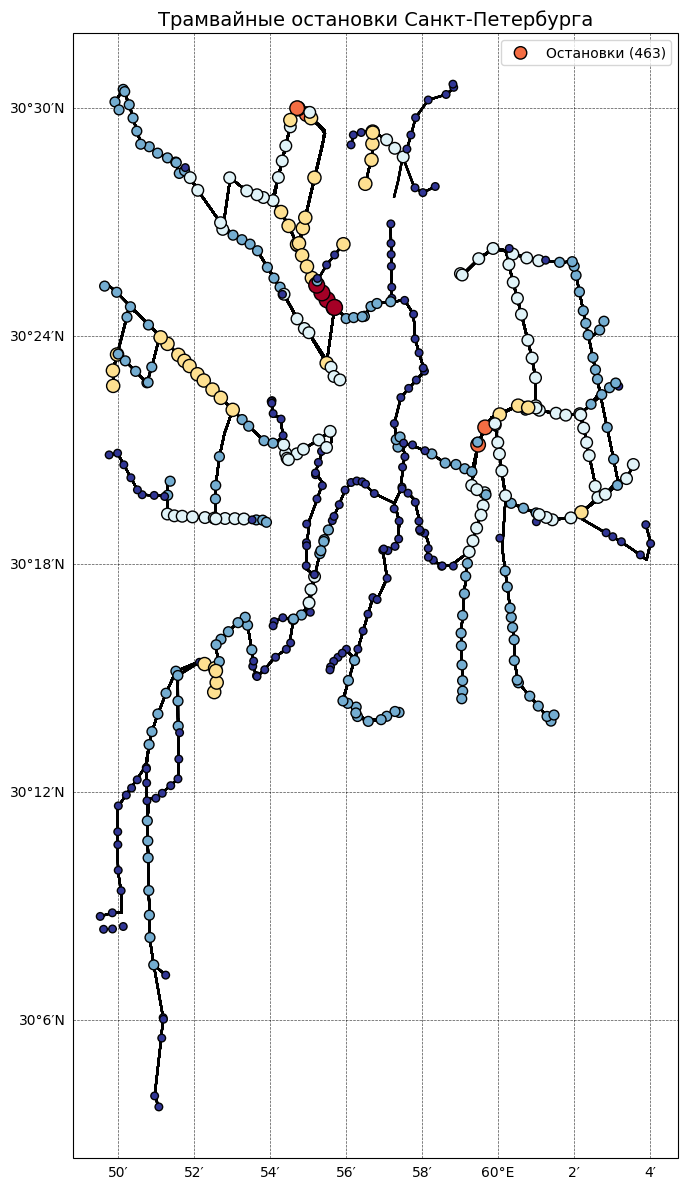

In [72]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats

fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

kde = stats.gaussian_kde([filtered_tram_df['X'].values, filtered_tram_df['Y'].values])

sizes = 10 + filtered_tram_df['Количество маршрутов'] * 20
scatter = ax.scatter(filtered_tram_df['X'], filtered_tram_df['Y'],
                    c=filtered_tram_df['Количество маршрутов'], s=sizes, alpha=1.0,
                    edgecolor='black', linewidth=1,
                     cmap='RdYlBu_r',
                    marker='o',
                    transform=ccrs.PlateCarree(),
                    zorder=10,
                    label=f'Остановки ({len(filtered_tram_df)})')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                  linewidth=0.5, color='black', alpha=0.7, linestyle='--')


for i in tram_routes['Числовой номер маршрута']:
  lst_x, lst_y = [], []
  for j in tram_routes['Координаты остановки'].where(tram_routes['Числовой номер маршрута'] == i):
    if pd.notna(j):
      x, y = j.split(',')
      lst_x.append(float(x))
      lst_y.append(float(y))
  plt.plot(np.array(lst_x), np.array(lst_y), linestyle='-', color='black')


gl.top_labels = False
gl.right_labels = False

plt.title(f'Трамвайные остановки Санкт-Петербурга', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('cart.png', dpi=150, bbox_inches='tight')
plt.show()